# Завдання 1

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

import copy
import pandas as pd

In [2]:
def bfs(capacity_matrix, flow_matrix, source, sink, parent):
    visited = [False] * len(capacity_matrix)
    queue = deque([source])
    visited[source] = True

    while queue:
        current_node = queue.popleft()
        for neighbor in range(len(capacity_matrix)):
            if not visited[neighbor] and capacity_matrix[current_node][neighbor] - flow_matrix[current_node][neighbor] > 0:
                parent[neighbor] = current_node
                visited[neighbor] = True
                if neighbor == sink:
                    return True
                queue.append(neighbor)
    return False

def edmonds_karp(capacity_matrix, source, sink):
    n = len(capacity_matrix)
    flow_matrix = [[0]*n for _ in range(n)]
    parent = [-1]*n
    max_flow = 0

    while bfs(capacity_matrix, flow_matrix, source, sink, parent):
        path_flow = float("inf")
        s = sink
        while s != source:
            path_flow = min(path_flow, capacity_matrix[parent[s]][s] - flow_matrix[parent[s]][s])
            s = parent[s]
        v = sink
        while v != source:
            u = parent[v]
            flow_matrix[u][v] += path_flow
            flow_matrix[v][u] -= path_flow
            v = u
        max_flow += path_flow
    return max_flow

In [3]:
terminals = ["Термінал 1", "Термінал 2"]
warehouses = ["Склад 1", "Склад 2", "Склад 3", "Склад 4"]
stores = [f"Магазин {i}" for i in range(1, 15)]

nodes = terminals + warehouses + stores

node_index = {name: i for i, name in enumerate(nodes)}

edges = [
    ("Термінал 1","Склад 1",25), ("Термінал 1","Склад 2",20), ("Термінал 1","Склад 3",15),
    ("Термінал 2","Склад 2",10), ("Термінал 2","Склад 3",15), ("Термінал 2","Склад 4",30),
    ("Склад 1","Магазин 1",15), ("Склад 1","Магазин 2",10), ("Склад 1","Магазин 3",20),
    ("Склад 2","Магазин 4",15), ("Склад 2","Магазин 5",10), ("Склад 2","Магазин 6",25),
    ("Склад 3","Магазин 7",20), ("Склад 3","Магазин 8",15), ("Склад 3","Магазин 9",10),
    ("Склад 4","Магазин 10",20), ("Склад 4","Магазин 11",10), ("Склад 4","Магазин 12",15),
    ("Склад 4","Магазин 13",5), ("Склад 4","Магазин 14",10)
]

n = len(nodes)
capacity_matrix = [[0]*n for _ in range(n)]

for u_name, v_name, cap in edges:
    u, v = node_index[u_name], node_index[v_name]
    capacity_matrix[u][v] = cap

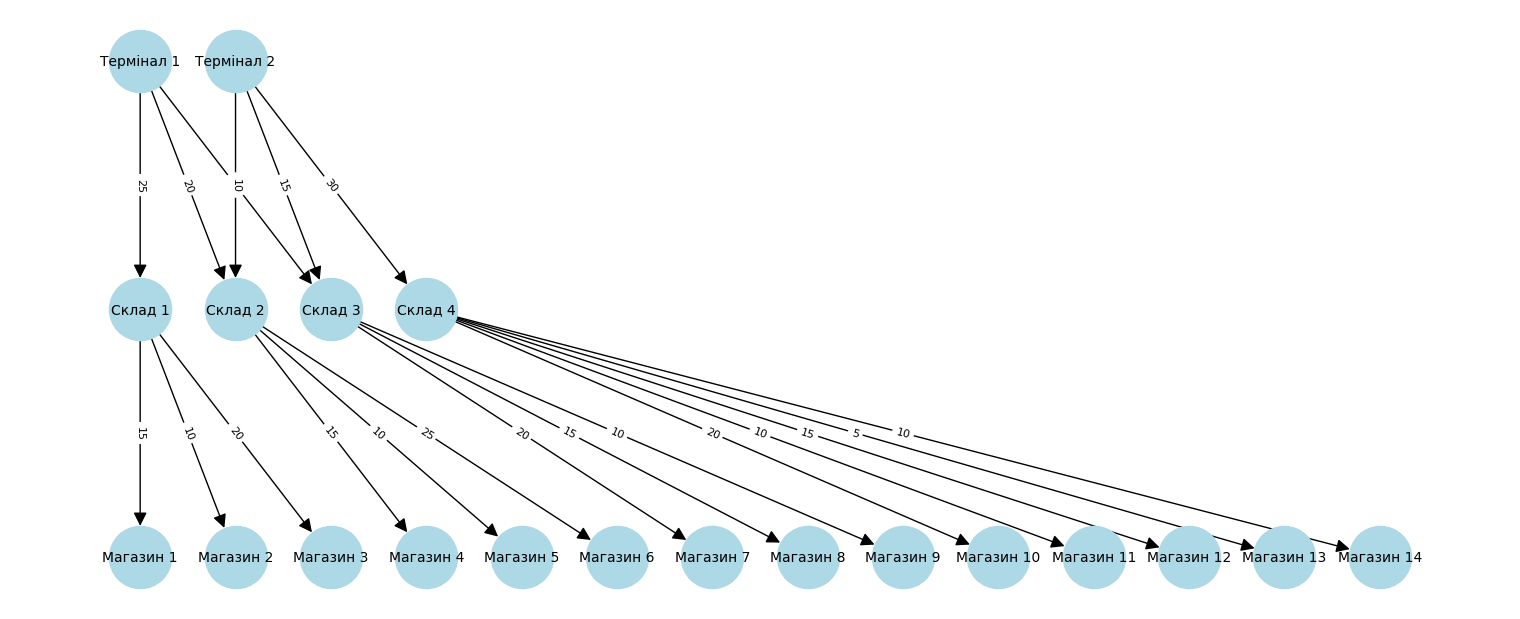

In [4]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
for u_name, v_name, cap in edges:
    G.add_edge(u_name, v_name, capacity=cap)

pos = {}
for i, node in enumerate(terminals):
    pos[node] = (i, 3)

for i, node in enumerate(warehouses):
    pos[node] = (i, 2)

for i, node in enumerate(stores):
    pos[node] = (i, 1)

plt.figure(figsize=(15,6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, arrowsize=20)

edge_labels = {(u,v): d['capacity'] for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

In [5]:
node_index = {i: name for name, i in node_index.items()}

In [6]:
n = 20
sources = [0, 1]  
sinks = list(range(6, 20))  

results = []

for s in sources:
    for t in sinks:
        matrix_copy = copy.deepcopy(capacity_matrix)
        flow = edmonds_karp(matrix_copy, s, t)
        results.append({
            "Термінал": node_index[s],
            "Магазин": node_index[t],
            "Потік": flow
        })

df = pd.DataFrame(results)
df

,Термінал,Магазин,Потік
0,Термінал 1,Магазин 1,15
1,Термінал 1,Магазин 2,10
2,Термінал 1,Магазин 3,20
3,Термінал 1,Магазин 4,15
4,Термінал 1,Магазин 5,10
5,Термінал 1,Магазин 6,20
6,Термінал 1,Магазин 7,15
7,Термінал 1,Магазин 8,15
8,Термінал 1,Магазин 9,10
9,Термінал 1,Магазин 10,0


1. Які термінали забезпечують найбільший потік товарів до магазинів?

Рівні

In [7]:
df.groupby("Термінал")['Потік'].sum().reset_index()

,Термінал,Потік
0,Термінал 1,130
1,Термінал 2,130


2. Які маршрути мають найменшу пропускну здатність і як це впливає на загальний потік?

З Термінал 2 до Магазин 13

In [8]:
df[df["Потік"] > 0].sort_values("Потік", ascending=True).head(5)

,Термінал,Магазин,Потік
26,Термінал 2,Магазин 13,5
17,Термінал 2,Магазин 4,10
24,Термінал 2,Магазин 11,10
22,Термінал 2,Магазин 9,10
19,Термінал 2,Магазин 6,10


3. Які магазини отримали найменше товарів і чи можна збільшити їх постачання, збільшивши пропускну здатність певних маршрутів?

Найменший потік в Магазин 13 і це обумовлено одним ребром. Тож оптимізація на цій ділянці матиме тільки локальний характер

4. Чи є вузькі місця, які можна усунути для покращення ефективності логістичної мережі?

З Термінал 2 до Склад 2 мала пропускна здатність при тому що маршрути з цього складу до магазинів мають вищу пропускну здатність

# Завдання 2

In [9]:
from trie import Trie

In [10]:
class Homework(Trie):
    def count_words_with_suffix(self, pattern: str) -> int:
        if not isinstance(pattern, str):
            raise TypeError("Pattern must be a string")

        count = 0
        for key in self.keys():
            if key.endswith(pattern):
                count += 1
        return count

    def has_prefix(self, prefix: str) -> bool:
        if not isinstance(prefix, str):
            raise TypeError("Prefix must be a string")

        return len(self.keys_with_prefix(prefix)) > 0

я підкоректував класс для префіксного дерева зробивши його більше схожим на словник додавши магічні методи, тому довелось тут трохи змінити виклик

In [13]:
trie = Homework()
words = ["apple", "application", "banana", "cat"]
for i, word in enumerate(words):
    trie[word] = i

In [16]:
assert trie.count_words_with_suffix("e") == 1  # apple
assert trie.count_words_with_suffix("ion") == 1  # application
assert trie.count_words_with_suffix("a") == 1  # banana
assert trie.count_words_with_suffix("at") == 1  # cat

# Перевірка наявності префікса
assert trie.has_prefix("app") == True  # apple, application
assert trie.has_prefix("bat") == False
assert trie.has_prefix("ban") == True  # banana
assert trie.has_prefix("ca") == True  # cat